# Zadanie 6
Stwórz model regresji SVR przy użyciu biblioteki scikit-learn. Chcemy przewidywać czas
przeżycia pacjentów na podstawie różnych cech zdrowia, takich jak wiek pacjenta, BMI,
ciśnienie krwi, poziom glukozy we krwi, Chlesterol oraz poziom kreatyniny we krwi. Dobierz odpowiednie wartości parametrów kernela i regularyzacji (C). Porównaj wyniki regresji z różnymi parametrami kernela i regularyzacji. Porównaj wyniki regresji SVR z innymi metodami regresji i zidentyfikuj, która daje najlepsze wyniki.

# Uwagi
Niestety nie znalazłem prawdziwego datasetu który zawierałby wszystkie wymienione cechy zdrowia. Znalazłem jednak dataset który zawiera informacje o pacjentach z niewydolnością serca. Zamiast przewidywać czas przeżycia pacjentów, będę przewidywał czy pacjent umrze czy nie.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [2]:
# Wczytanie danych
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Dane do modelu podział na treningowe i testowe
X = data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'smoking', 'time', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model regresji SVR

In [4]:
# Model regresji SVR
svr = SVR(kernel='rbf', C=1.0)
svr.fit(X_train, y_train)

# Predykcje
y_pred = svr.predict(X_test)

In [5]:
# Średni Błąd kwadratowy modelu
mean_squared_error(y_test, y_pred)

0.3435787306748329

Text(0.5, 0, 'age')

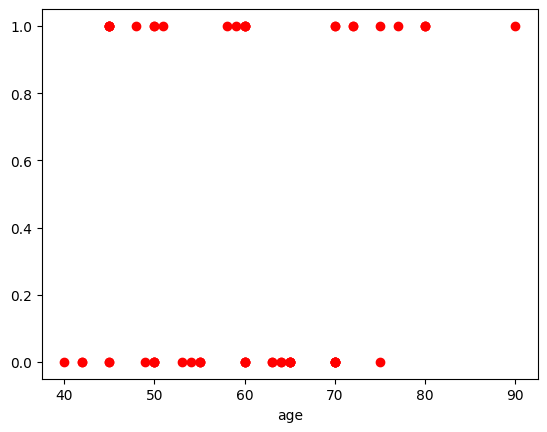

In [6]:
# Zamień na wartości binarne przy warunku 0.5
y_pred = np.where(y_pred >= 0.1, 1, 0)
y_pred

# Wizualizacja dla testowych danych
plt.scatter(X_test['age'], y_test, color = 'red')
plt.xlabel('age')

Text(0.5, 0, 'age')

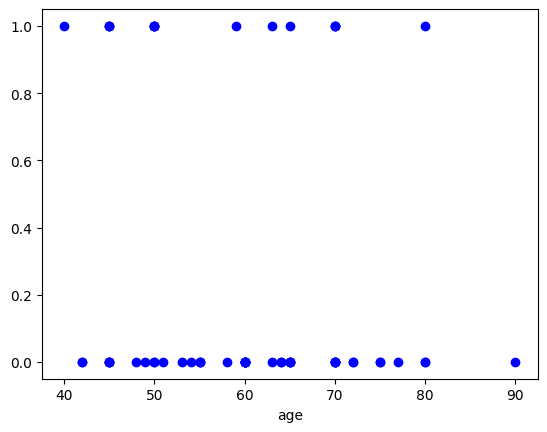

In [7]:
# Wizualizacja dla testowych danych
plt.scatter(X_test['age'], y_pred, color = 'blue')
plt.xlabel('age')

# Model Regresji Logistycznej
Model SVR kompletnie nie nadaje się do naszego problemu. Zamiast tego użyjemy modelu regresji logistycznej, która powinna o wiele lepiej przewidzieć czy nasz pacjent umrze czy nie.

In [8]:
# Tworzenie modelu regresji logistycznej
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Predykcje
y_pred = logistic.predict(X_test)


In [9]:
# Średni Błąd kwadratowy modelu
mean_squared_error(y_test, y_pred)

0.18333333333333332

In [10]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

Text(0.5, 1.0, 'Wykres dla testowych danych')

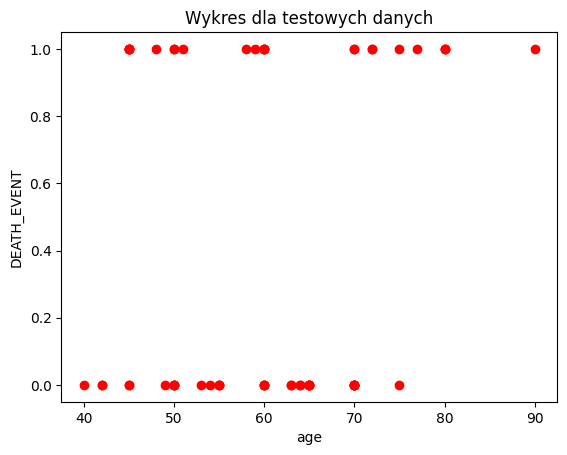

In [14]:
# Wizualizacja dla testowych danych
plt.scatter(X_test['age'], y_test, color = 'red')
plt.xlabel('age')
plt.ylabel('DEATH_EVENT')
plt.title('Wykres dla testowych danych')

Text(0.5, 1.0, 'Predykcje modelu regresji logistycznej')

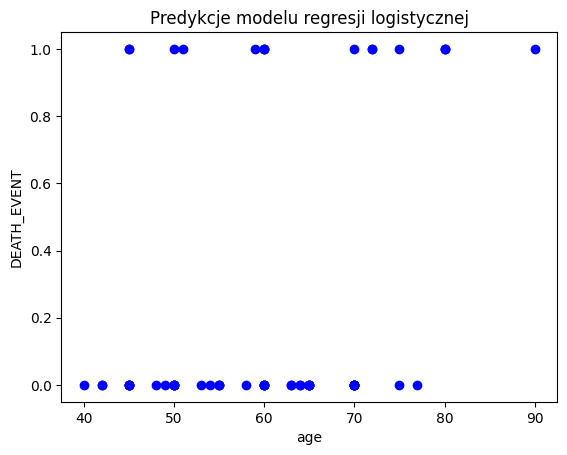

In [13]:
# Wizuazlizacja dla predykcji
plt.scatter(X_test['age'], y_pred, color = 'blue')
plt.xlabel('age')
plt.ylabel('DEATH_EVENT')
plt.title('Predykcje modelu regresji logistycznej')
